In [1]:
import math
import random
import numpy as np
import pandas as pd
from scipy.stats import beta
import matplotlib.pyplot as plt

Text(0,0.5,'y')

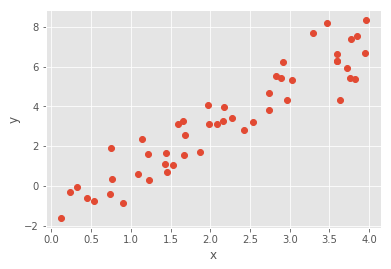

In [79]:
#true value
beta_0_true = -1
beta_1_true = 2
sigma = 1 #known
#data simulation
N = 50
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(beta_0_true + beta_1_true * x, sigma)

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

In [74]:
#initial value
beta_0 = 0.
beta_1 = 0.

#hyperparameter
beta_00 = 0.
beta_01 = 0.
Lambda_00 = 1. #inverse variance
Lambda_01 = 1. #inverse variance
T = len(y)

#Posterior
pos_beta = []

for i in range(1000):
    Lambda_10 = Lambda_00 + T / (sigma **2)
    beta_0_mu = beta_00 * Lambda_00 + np.sum(y-x * beta_1) / (sigma**2)
    beta_0_mu /= Lambda_10
    beta_0 = np.random.normal(beta_0_mu, 1 / np.sqrt(Lambda_10))

    Lambda_11 = Lambda_01 + np.sum(x**2) / (sigma **2)
    beta_1_mu = beta_01 * Lambda_01 + np.sum((y-beta_0)*x) / (sigma**2)
    beta_1_mu /= Lambda_11
    beta_1 = np.random.normal(beta_1_mu, 1 / np.sqrt(Lambda_11))

    pos_beta.append([beta_0, beta_1])

trace = pd.DataFrame(pos_beta)
trace.columns = ['beta_0', 'beta_1']

print beta_0, beta_1

-0.995072649493 1.9829753858


<Figure size 1440x720 with 0 Axes>

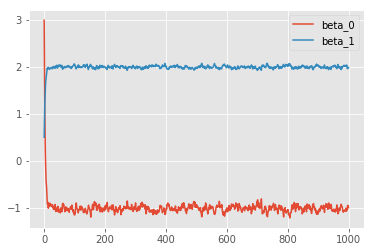

In [75]:
%matplotlib inline
plt.figure(figsize=(20, 10))
plt.style.use('ggplot')
trace.plot()
plt.legend()
plt.show()

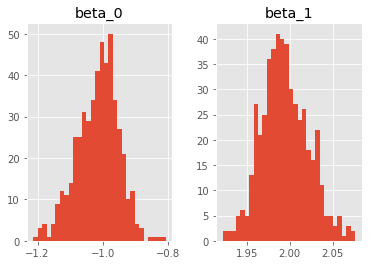

In [76]:
trace_burnt = trace[500:]
hist_plot = trace_burnt.hist(bins = 30, layout = (1,2))

In [77]:
print(trace_burnt.mean())
print(trace_burnt.std())

beta_0   -1.014986
beta_1    1.994468
dtype: float64
beta_0    0.063523
beta_1    0.027212
dtype: float64
